<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 3. Modelos aleatorios </h3>
<h3 style="text-align: center;"> Modelo de Colas (ejercicios propuestos) </h3>

### Ejercicio 

Se propone un ejercicio teórico-práctico. Consiste en idear un modelo para un sistema real aleatorio markoviano, con planteamiento lipre. Se valorará positivamente que el ajuste o estimación de los parámetros o variables aleatorias iniciales a partir de muestreos o toma de datos reales. El objetivo del modelo es ayudar a través de las simulaciones a la toma de decisiones óptimas de gestión/utilización del sistema

Se dan dos ejemplos a modo de sugerencias, pero puede ser cualquier otro proceso markoviano similar a los estudiados. 

- Juego de azar sin memoria, en el que el conjunto de estados es finito (ganar, perder, empatar, etc.) y las probabilidades son fijas. A través del modelo se simularía el estado a largo plazo del jugador, así como la estrategia que optimizara un objetivo determinado.  

- Un comercio que se pide en barra (ferretería, cafetería, etc), en la cual se dispone de una (o varias) personas antendiendo, con un tiempo de atención y servicio medio determinado. Cada servicio supone un ingreso económico y la llegada de clientes se produce cada cierto tiempo y se ponen en cola. Si la cola excede de un número de individuos, el cliente abandona el local. Se podría estudiar el ingreso y pérdida diaria por abandono del cliente, así como la conveniencia o no de contratar a otro empleado si su salario es $w$ por día. 

### Parámetros del gimnasio FitnessPark - Las Ramblas

Planteamiento del Modelo
Se modela la gestión de un gimnasio como un sistema estocástico markoviano. En este modelo, el conjunto de estados está definido por la ocupación de los diferentes tipos de máquinas disponibles y el tamaño de la cola de usuarios que esperan para acceder al equipo. Las transiciones entre estados dependen de tasas dinámicas de llegada y salida de usuarios, y del comportamiento de los mismos ante el tiempo de espera.

Variables del Modelo
N_equipos: Número de máquinas disponibles por tipo, representando los recursos limitados del gimnasio.
mu: Tasa de uso medio de cada tipo de máquina, que refleja el tiempo promedio que un usuario ocupa el equipo.
umbral_cola: Límite de la cola que los usuarios consideran aceptable antes de abandonar el gimnasio.
max_intentos: Número máximo de intentos que un usuario realizará para encontrar una máquina disponible antes de abandonar definitivamente el gimnasio.
franjas_horarias: Periodos del día con distintas tasas de llegada de usuarios (lambda_), que reflejan variaciones en la demanda a lo largo de la jornada.
Funcionamiento del Modelo
Estados: Cada estado describe la ocupación actual de las máquinas y el tamaño de la cola.
Matriz de Transición Dinámica:
En lugar de predefinir todas las probabilidades de transición entre estados, el modelo calcula dinámicamente las transiciones posibles desde el estado actual.
Esto reduce drásticamente el consumo de memoria, ya que solo se almacenan las probabilidades relevantes para el estado actual.
Simulación:
Se inicializa el sistema en un estado libre (sin usuarios).
En cada paso de tiempo, se evalúan las posibles transiciones (llegadas, salidas, y abandonos) y se selecciona la próxima transición según las probabilidades calculadas.
Resultados por Franja Horaria: Se registran métricas clave:
Ocupación promedio por tipo de máquina.
Número y tasa de abandonos dinámicos (usuarios que dejan la cola para intentar otras máquinas).
Número y tasa de abandonos globales (usuarios que abandonan el gimnasio).
Posibles Resultados
El modelo permite obtener:

Ocupación Promedio: Identifica las máquinas con mayor y menor demanda.
Tasas de Abandono: Proporción de usuarios que abandonan el gimnasio o la cola, útil para evaluar el nivel de satisfacción del cliente.
Impacto de las Variaciones en Recursos:
Simulando escenarios con más máquinas o cambios en las tasas de llegada/salida, se puede evaluar la conveniencia de invertir en nuevos equipos.
Optimización del personal en diferentes franjas horarias.

In [ ]:
import numpy as np

# Parámetros del sistema
N_equipos = {"poleas": 1, "prensa": 3, "banco": 3, "elipticas": 1}  # Número de equipos por tipo
mu = {"poleas": 5, "prensa": 8, "banco": 10, "elipticas": 12}       # Tasa de uso por tipo (minutos)
T_total = 60                                                      # Duración de la simulación (minutos)
umbral_cola = 2                                                    # Umbral para considerar abandono
max_intentos = 5                                                   # Máximo de intentos antes de abandonar el gimnasio

# Parámetros de franjas horarias ajustadas (de 6:00 a 24:00)
franjas_horarias = {
    "mañana": {"inicio": 6, "fin": 10, "lambda": {"poleas": 5, "prensa": 3, "banco": 3, "elipticas": 4}},
    "mediodía": {"inicio": 10, "fin": 16, "lambda": {"poleas": 2, "prensa": 1, "banco": 1, "elipticas": 2}},
    "tarde": {"inicio": 16, "fin": 20, "lambda": {"poleas": 6, "prensa": 4, "banco": 4, "elipticas": 5}},
    "noche": {"inicio": 20, "fin": 24, "lambda": {"poleas": 3, "prensa": 2, "banco": 2, "elipticas": 3}},
}

# Mapas de índices para estados y tipos
tipo_a_indice = {"poleas": 0, "prensa": 1, "banco": 2, "elipticas": 3}
indice_a_tipo = {v: k for k, v in tipo_a_indice.items()}

# Función para calcular probabilidad de abandono dinámica
def probabilidad_abandono_dinamica(q, umbral_cola):
    """Devuelve la probabilidad de abandono en función del tamaño de la cola."""
    if q <= umbral_cola:
        return 0  # Sin abandono por debajo del umbral
    else:
        return min(0.5 * (q - umbral_cola + 1), 1.0)  # Crecimiento más rápido

# Generar todos los estados posibles
def generar_estados(N_equipos):
    """Genera todos los estados posibles como combinaciones de ocupación."""
    estados = []
    for b in range(N_equipos["poleas"] + 1):
        for c in range(N_equipos["prensa"] + 1):
            for p in range(N_equipos["banco"] + 1):
                for e in range(N_equipos["elipticas"] + 1):
                    for q in range(10):  # Hasta 10 en cola (configurable)
                        estados.append((b, c, p, e, q))
    return estados

# Función para asignar franja horaria según la hora
def obtener_franja_horaria(hora_actual):
    """Devuelve la franja horaria correspondiente a la hora actual."""
    for franja, datos in franjas_horarias.items():
        if datos["inicio"] <= hora_actual < datos["fin"]:
            return franja
    return None  # Hora fuera del horario del gimnasio

# Ajustar hora para que esté dentro del horario de apertura
def ajustar_hora_a_horario(tiempo_actual):
    """Ajusta el tiempo actual para ignorar las horas fuera del horario del gimnasio."""
    hora_actual = tiempo_actual % 24
    while hora_actual < 6 or hora_actual >= 24:  # Si está fuera del horario [6, 24)
        tiempo_actual += 1  # Avanzamos al siguiente minuto
        hora_actual = tiempo_actual % 24
    return tiempo_actual

# Obtener tasas dinámicas según la hora actual
def obtener_lambda(hora_actual):
    """Devuelve las tasas de llegada (lambda) según la hora actual."""
    for franja, datos in franjas_horarias.items():
        if datos["inicio"] <= hora_actual < datos["fin"]:
            return datos["lambda"]
    return {"poleas": 1, "prensa": 1, "banco": 1, "elipticas": 1}  # Default si algo falla

# Crear matriz de transición dinámica
def crear_matriz_transicion_dinamica(estados, N_equipos, hora_actual, mu, umbral_cola):
    """Crea una matriz de transición basada en las tasas lambda dinámicas."""
    lambda_ = obtener_lambda(hora_actual)  # Obtener lambda según la hora
    n_estados = len(estados)
    matriz = np.zeros((n_estados, n_estados))

    for i, estado_actual in enumerate(estados):
        b, c, p, e, q = estado_actual  # Descomponer estado
        for j, estado_siguiente in enumerate(estados):
            b_, c_, p_, e_, q_ = estado_siguiente  # Descomponer siguiente estado
            prob = 0

            # Llegada de usuario
            for tipo, max_eq in N_equipos.items():
                indice = tipo_a_indice[tipo]
                if estado_actual[indice] < max_eq:  # Máquina disponible
                    if estado_siguiente[indice] == estado_actual[indice] + 1 and q_ == q:
                        prob += lambda_[tipo] / sum(lambda_.values())
                else:  # Máquinas ocupadas, usuario entra en cola
                    if estado_siguiente[-1] == q + 1:
                        prob += lambda_[tipo] / sum(lambda_.values())

            # Salida de usuario
            for tipo in N_equipos:
                indice = tipo_a_indice[tipo]
                if estado_actual[indice] > 0:  # Máquina ocupada
                    if estado_siguiente[indice] == estado_actual[indice] - 1 and q_ == q:
                        prob += mu[tipo] / sum(mu.values())
                elif q > 0:  # Reducir cola y asignar máquina
                    if estado_siguiente[-1] == q - 1 and estado_siguiente[indice] == estado_actual[indice] + 1:
                        prob += mu[tipo] / sum(mu.values())

            # Abandono dinámico (por máquina)
            if q > 0 and q_ == q - 1:
                prob += probabilidad_abandono_dinamica(q, umbral_cola)

            # Abandono global (irse del gimnasio)
            if all(estado_actual[indice] >= N_equipos[tipo] for tipo, indice in tipo_a_indice.items()) and q >= umbral_cola:
                prob += 0.9  # Alta probabilidad de abandonar

            matriz[i, j] = prob

        # Normalizar fila para que sea una distribución de probabilidad
        matriz[i, :] /= np.sum(matriz[i, :])

    return matriz

def simulacion_markov_dinamica(estados, N_equipos, T_total, mu, umbral_cola):
    """Simula el sistema con tasas dinámicas y abandono dependiente del tamaño de la cola."""
    n_estados = len(estados)
    estado_actual = 0  # Comenzamos con todo libre (primer estado)
    historial_estados = []
    historial_franjas = []
    tiempo_actual = 0

    total_abandonos_globales = 0  # Contador para abandonos globales
    total_abandonos_dinamicos = 0  # Contador para abandonos dinámicos

    while tiempo_actual < T_total:
        tiempo_actual = ajustar_hora_a_horario(tiempo_actual)
        hora_actual = tiempo_actual % 24
        franja_actual = obtener_franja_horaria(hora_actual)
        historial_franjas.append(franja_actual)

        # Crear matriz de transición dinámica
        matriz_transicion = crear_matriz_transicion_dinamica(estados, N_equipos, hora_actual, mu, umbral_cola)

        # Elegir el siguiente estado basado en la matriz de transición
        siguiente_estado = np.random.choice(len(estados), p=matriz_transicion[estado_actual])
        historial_estados.append(estados[siguiente_estado])

        # Identificar abandonos
        b, c, p, e, q = estados[estado_actual]
        b_, c_, p_, e_, q_ = estados[siguiente_estado]

        # Abandono dinámico (abandona una máquina específica)
        if q > 0 and q_ < q:
            total_abandonos_dinamicos += 1

        # Abandono global (irse del gimnasio)
        if all(estados[siguiente_estado][indice] >= N_equipos[tipo] for tipo, indice in tipo_a_indice.items()) and estados[siguiente_estado][-1] >= umbral_cola:
            total_abandonos_globales += 1

        estado_actual = siguiente_estado
        tiempo_actual += 1

    return historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales


# Análisis por franjas horarias, ocupación por máquina y tasas de abandono
def analizar_por_franjas(historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales, N_equipos):
    """Calcula ocupación por máquina y abandonos por franja horaria."""
    resultados_por_franja = {}
    contador_abandonos_dinamicos = 0
    contador_abandonos_globales = 0

    # Inicializar estructuras de datos
    for franja in franjas_horarias.keys():
        resultados_por_franja[franja] = {
            "ocupacion": {maquina: 0 for maquina in N_equipos.keys()},
            "contador": 0,
            "abandono_dinamico": 0,
            "abandono_global": 0
        }

    # Recorremos los estados y las franjas
    for i, estado in enumerate(historial_estados):
        franja_actual = historial_franjas[i]
        if franja_actual is not None:
            resultados_por_franja[franja_actual]["contador"] += 1

            # Acumular ocupación por máquina
            for maquina, indice in tipo_a_indice.items():
                resultados_por_franja[franja_actual]["ocupacion"][maquina] += estado[indice]

        # Contar abandonos dinámicos y globales por franja
        if i > 0:
            estado_anterior = historial_estados[i - 1]
            # Detectar abandono dinámico
            if estado_anterior[-1] > estado[-1]:  # Cola disminuyó
                contador_abandonos_dinamicos += 1
                resultados_por_franja[franja_actual]["abandono_dinamico"] += 1

            # Detectar abandono global
            if all(estado[indice] >= N_equipos[maquina] for maquina, indice in tipo_a_indice.items()) and estado[-1] >= umbral_cola:
                contador_abandonos_globales += 1
                resultados_por_franja[franja_actual]["abandono_global"] += 1

    # Calcular promedios y tasas por franja
    for franja, datos in resultados_por_franja.items():
        for maquina in N_equipos.keys():
            if datos["contador"] > 0:
                datos["ocupacion"][maquina] /= datos["contador"]
        datos["tasa_abandono_dinamico"] = datos["abandono_dinamico"] / max(1, datos["contador"])
        datos["tasa_abandono_global"] = datos["abandono_global"] / max(1, datos["contador"])

    return resultados_por_franja


# Configurar y ejecutar simulación
estados = generar_estados(N_equipos)
historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales = simulacion_markov_dinamica(
    estados, N_equipos, T_total, mu, umbral_cola
)

# Analizar resultados
resultados_por_franja = analizar_por_franjas(historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales, N_equipos)

# Mostrar resultados por franjas horarias
print("\nResultados por franja horaria:")
for franja, datos in resultados_por_franja.items():
    print(f"\nFranja horaria: {franja}")
    print("  Ocupación promedio por máquina:")
    for maquina, ocupacion in datos["ocupacion"].items():
        print(f"    {maquina.capitalize()}: {ocupacion:.2f}")
    print(f"  Tasa de abandono dinámico: {datos['tasa_abandono_dinamico']:.2f}")
    print(f"  Tasa de abandono global: {datos['tasa_abandono_global']:.2f}")

# Mostrar resultados globales
print("\nResultados globales:")
print(f"  Total abandonos dinámicos: {total_abandonos_dinamicos}")
print(f"  Total abandonos globales: {total_abandonos_globales}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulación previamente configurada (ajustar tu código antes de esto)

# Crear gráficas
def generar_graficas(resultados_por_franja, total_abandonos_dinamicos, total_abandonos_globales):
    # Datos para las gráficas
    franjas = list(resultados_por_franja.keys())
    maquinas = list(next(iter(resultados_por_franja.values()))["ocupacion"].keys())

    # --- Gráfica 1: Ocupación promedio por máquina en cada franja horaria ---
    plt.figure(figsize=(12, 6))
    for maquina in maquinas:
        ocupacion = [resultados_por_franja[franja]["ocupacion"][maquina] for franja in franjas]
        plt.plot(franjas, ocupacion, marker="o", label=maquina.capitalize())
    plt.title("Ocupación promedio por máquina en cada franja horaria")
    plt.xlabel("Franja horaria")
    plt.ylabel("Ocupación promedio")
    plt.legend(title="Máquinas")
    plt.grid()
    plt.show()

    # --- Gráfica 2: Abandonos dinámicos y globales por franja horaria ---
    abandonos_dinamicos = [resultados_por_franja[franja]["abandono_dinamico"] for franja in franjas]
    abandonos_globales = [resultados_por_franja[franja]["abandono_global"] for franja in franjas]

    x = np.arange(len(franjas))  # Posiciones para las barras
    width = 0.35  # Ancho de las barras

    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, abandonos_dinamicos, width, label="Abandonos Dinámicos")
    plt.bar(x + width / 2, abandonos_globales, width, label="Abandonos Globales")
    plt.title("Abandonos dinámicos y globales por franja horaria")
    plt.xlabel("Franja horaria")
    plt.ylabel("Número de abandonos")
    plt.xticks(x, franjas)
    plt.legend()
    plt.grid(axis="y")
    plt.show()

    # --- Gráfica 3: Totales de abandonos ---
    labels = ["Abandonos Dinámicos", "Abandonos Globales"]
    valores = [total_abandonos_dinamicos, total_abandonos_globales]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, valores, color=["blue", "orange"])
    plt.title("Totales de abandonos")
    plt.ylabel("Número de abandonos")
    plt.grid(axis="y")
    plt.show()


# Generar gráficas con los resultados de la simulación
generar_graficas(resultados_por_franja, total_abandonos_dinamicos, total_abandonos_globales)


## Nuevo

En el segundo código, la matriz de transición no se construye completamente como un array fijo de dimensiones 
**𝑛** × **𝑛**, en lugar de eso, las transiciones se generan dinámicamente solo para el estado actual. Esto se logra evaluando, en cada paso, los estados alcanzables desde el estado actual y calculando las probabilidades asociadas a esas transiciones. Luego, estas probabilidades se normalizan para garantizar que formen una distribución válida. Al evitar la preconstrucción de la matriz completa y trabajar solo con transiciones locales, se reduce significativamente el consumo de memoria, lo que hace que el modelo sea más escalable y adecuado para configuraciones complejas con muchos estados posibles.

In [1]:
import numpy as np

# Parámetros del sistema
N_equipos = {"poleas": 4 , "prensa": 5, "banco": 8, "cintas":10, "multipower": 2}  # Número de equipos por tipo
mu = {"poleas": 15, "prensa": 20, "banco": 10, "cintas": 30, "multipower": 10}       # Tasa de uso por tipo (minutos)
T_total = 60                                                        # Duración de la simulación (minutos)
umbral_cola = 2                                                    # Umbral para considerar abandono
max_intentos = 5                                                   # Máximo de intentos antes de abandonar el gimnasio

# Parámetros de franjas horarias ajustadas (de 6:00 a 24:00)
franjas_horarias = {
    "mañana": {"inicio": 6, "fin": 10, "lambda": {"poleas": 5, "prensa": 3, "banco": 3, "cintas": 4, "multipower": 1}},
    "mediodía": {"inicio": 10, "fin": 16, "lambda": {"poleas": 2, "prensa": 1, "banco": 1, "cintas": 2, "multipower": 1}},
    "tarde": {"inicio": 16, "fin": 20, "lambda": {"poleas": 6, "prensa": 4, "banco": 4, "cintas": 5, "multipower": 2}},
    "noche": {"inicio": 20, "fin": 24, "lambda": {"poleas": 3, "prensa": 2, "banco": 2, "cintas": 3, "multipower": 1}},
}

# Mapas de índices para estados y tipos
tipo_a_indice = {"poleas": 0, "prensa": 1, "banco": 2, "cintas": 3, "multipower": 4}
indice_a_tipo = {v: k for k, v in tipo_a_indice.items()}

In [2]:
#Función para calcular probabilidad de abandono dinámica
def probabilidad_abandono_dinamica(q, umbral_cola):
    """Devuelve la probabilidad de abandono en función del tamaño de la cola."""
    if q <= umbral_cola:
        return 0  # Sin abandono por debajo del umbral
    else:
        return min(0.5 * (q - umbral_cola + 1), 1.0)  # Crecimiento más rápido


# Generar todos los estados posibles
def generar_estados(N_equipos):
    """Genera todos los estados posibles como combinaciones de ocupación."""
    estados = []
    for b in range(N_equipos["poleas"] + 1):
        for c in range(N_equipos["prensa"] + 1):
            for p in range(N_equipos["banco"] + 1):
                for e in range(N_equipos["cintas"] + 1):
                    for mp in range(N_equipos["multipower"] + 1):
                        for q in range(10):  # Hasta 10 en cola (configurable)
                            estados.append((b, c, p, e, mp, q))
    return estados



# Función para asignar franja horaria según la hora
def obtener_franja_horaria(hora_actual):
    """Devuelve la franja horaria correspondiente a la hora actual."""
    for franja, datos in franjas_horarias.items():
        if datos["inicio"] <= hora_actual < datos["fin"]:
            return franja
    return None  # Hora fuera del horario del gimnasio



# Ajustar hora para que esté dentro del horario de apertura
def ajustar_hora_a_horario(tiempo_actual):
    """Ajusta el tiempo actual para ignorar las horas fuera del horario del gimnasio."""
    hora_actual = tiempo_actual % 24
    while hora_actual < 6 or hora_actual >= 24:  # Si está fuera del horario [6, 24)
        tiempo_actual += 1  # Avanzamos al siguiente minuto
        hora_actual = tiempo_actual % 24
    return tiempo_actual



# Obtener tasas dinámicas según la hora actual
def obtener_lambda(hora_actual):
    """Devuelve las tasas de llegada (lambda) según la hora actual."""
    for franja, datos in franjas_horarias.items():
        if datos["inicio"] <= hora_actual < datos["fin"]:
            return datos["lambda"]
    return {"poleas": 1, "prensa": 1, "banco": 1, "elipticas": 1}  # Default si algo falla



# Generar dinámicamente las probabilidades de transición
def generar_transicion_dinamica(estado_actual, estados, N_equipos, lambda_, mu, umbral_cola):
    """Calcula las probabilidades de transición dinámicamente desde un estado."""
    transiciones = []
    probabilidades = []

    b, c, p, e, mp, q = estado_actual

    for estado_siguiente in estados:
        b_, c_, p_, e_, mp_, q_ = estado_siguiente
        prob = 0

        # Llegada de usuario
        for tipo, max_eq in N_equipos.items():
            indice = tipo_a_indice[tipo]
            if estado_actual[indice] < max_eq:  # Máquina disponible
                if estado_siguiente[indice] == estado_actual[indice] + 1 and q_ == q:
                    prob += lambda_[tipo] / sum(lambda_.values())
            else:  # Máquinas ocupadas, usuario entra en cola
                if estado_siguiente[-1] == q + 1:
                    prob += lambda_[tipo] / sum(lambda_.values())

        # Salida de usuario
        for tipo in N_equipos:
            indice = tipo_a_indice[tipo]
            if estado_actual[indice] > 0:  # Máquina ocupada
                if estado_siguiente[indice] == estado_actual[indice] - 1 and q_ == q:
                    prob += mu[tipo] / sum(mu.values())
            elif q > 0:  # Reducir cola y asignar máquina
                if estado_siguiente[-1] == q - 1 and estado_siguiente[indice] == estado_actual[indice] + 1:
                    prob += mu[tipo] / sum(mu.values())

        # Abandono dinámico
        if q > 0 and q_ == q - 1:
            prob += probabilidad_abandono_dinamica(q, umbral_cola)

        # Abandono global
        if all(estado_actual[indice] >= N_equipos[tipo] for tipo, indice in tipo_a_indice.items()) and q >= umbral_cola:
            prob += 0.9  # Alta probabilidad de abandonar el gimnasio

        if prob > 0:
            transiciones.append(estado_siguiente)
            probabilidades.append(prob)

    # Normalizar las probabilidades
    total = sum(probabilidades)
    probabilidades = [p / total for p in probabilidades]

    return transiciones, probabilidades



# Simulación del sistema con transiciones dinámicas
def simulacion_markov_dinamica(estados, N_equipos, T_total, mu, umbral_cola):
    """Simula el sistema con transiciones generadas dinámicamente."""
    estado_actual = estados[0]  # Comenzamos con todo libre (primer estado)
    historial_estados = []
    historial_franjas = []
    tiempo_actual = 0
    total_abandonos_globales = 0
    total_abandonos_dinamicos = 0

    while tiempo_actual < T_total:
        hora_actual = tiempo_actual % 24
        lambda_ = obtener_lambda(hora_actual)
        franja_actual = next((f for f, v in franjas_horarias.items() if v["inicio"] <= hora_actual < v["fin"]), None)

        # Ignorar si está fuera del horario
        if franja_actual is None:
            tiempo_actual += 1
            continue

        historial_franjas.append(franja_actual)

        # Generar transiciones dinámicas
        transiciones, probabilidades = generar_transicion_dinamica(estado_actual, estados, N_equipos, lambda_, mu, umbral_cola)

        # Elegir transición
        estado_actual = transiciones[np.random.choice(len(transiciones), p=probabilidades)]
        historial_estados.append(estado_actual)

        tiempo_actual += 1

    return historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales



# Análisis por franjas horarias, ocupación por máquina y tasas de abandono
def analizar_por_franjas(historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales, N_equipos):
    """Calcula ocupación por máquina y abandonos por franja horaria."""
    resultados_por_franja = {}
    contador_abandonos_dinamicos = 0
    contador_abandonos_globales = 0

    # Inicializar estructuras de datos
    for franja in franjas_horarias.keys():
        resultados_por_franja[franja] = {
            "ocupacion": {maquina: 0 for maquina in N_equipos.keys()},
            "contador": 0,
            "abandono_dinamico": 0,
            "abandono_global": 0
        }

    # Recorremos los estados y las franjas
    for i, estado in enumerate(historial_estados):
        franja_actual = historial_franjas[i]
        if franja_actual is not None:
            resultados_por_franja[franja_actual]["contador"] += 1

            # Acumular ocupación por máquina
            for maquina, indice in tipo_a_indice.items():
                resultados_por_franja[franja_actual]["ocupacion"][maquina] += estado[indice]

        # Contar abandonos dinámicos y globales por franja
        if i > 0:
            estado_anterior = historial_estados[i - 1]
            # Detectar abandono dinámico
            if estado_anterior[-1] > estado[-1]:  # Cola disminuyó
                contador_abandonos_dinamicos += 1
                resultados_por_franja[franja_actual]["abandono_dinamico"] += 1

            # Detectar abandono global
            if all(estado[indice] >= N_equipos[maquina] for maquina, indice in tipo_a_indice.items()) and estado[-1] >= umbral_cola:
                contador_abandonos_globales += 1
                resultados_por_franja[franja_actual]["abandono_global"] += 1

    # Calcular promedios y tasas por franja
    for franja, datos in resultados_por_franja.items():
        for maquina in N_equipos.keys():
            if datos["contador"] > 0:
                datos["ocupacion"][maquina] /= datos["contador"]
        datos["tasa_abandono_dinamico"] = datos["abandono_dinamico"] / max(1, datos["contador"])
        datos["tasa_abandono_global"] = datos["abandono_global"] / max(1, datos["contador"])

    return resultados_por_franja

In [3]:

# Configurar y ejecutar simulación
estados = generar_estados(N_equipos)
historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales = simulacion_markov_dinamica(
    estados, N_equipos, T_total, mu, umbral_cola
)

# Analizar resultados
resultados_por_franja = analizar_por_franjas(historial_estados, historial_franjas, total_abandonos_dinamicos, total_abandonos_globales, N_equipos)

# Mostrar resultados por franjas horarias
print("\nResultados por franja horaria:")
for franja, datos in resultados_por_franja.items():
    print(f"\nFranja horaria: {franja}")
    print("  Ocupación promedio por máquina:")
    for maquina, ocupacion in datos["ocupacion"].items():
        print(f"    {maquina.capitalize()}: {ocupacion:.2f}")
    print(f"  Tasa de abandono dinámico: {datos['tasa_abandono_dinamico']:.2f}")
    print(f"  Tasa de abandono global: {datos['tasa_abandono_global']:.2f}")

# Mostrar resultados globales
print("\nResultados globales:")
print(f"  Total abandonos dinámicos: {total_abandonos_dinamicos}")
print(f"  Total abandonos globales: {total_abandonos_globales}")


Resultados por franja horaria:

Franja horaria: mañana
  Ocupación promedio por máquina:
    Poleas: 1.58
    Prensa: 2.42
    Banco: 3.67
    Cintas: 5.42
    Multipower: 1.00
  Tasa de abandono dinámico: 0.17
  Tasa de abandono global: 0.00

Franja horaria: mediodía
  Ocupación promedio por máquina:
    Poleas: 2.36
    Prensa: 3.14
    Banco: 3.50
    Cintas: 5.93
    Multipower: 0.71
  Tasa de abandono dinámico: 0.21
  Tasa de abandono global: 0.00

Franja horaria: tarde
  Ocupación promedio por máquina:
    Poleas: 2.25
    Prensa: 2.75
    Banco: 3.62
    Cintas: 5.88
    Multipower: 1.00
  Tasa de abandono dinámico: 0.00
  Tasa de abandono global: 0.00

Franja horaria: noche
  Ocupación promedio por máquina:
    Poleas: 2.38
    Prensa: 2.25
    Banco: 3.38
    Cintas: 4.00
    Multipower: 0.62
  Tasa de abandono dinámico: 0.12
  Tasa de abandono global: 0.00

Resultados globales:
  Total abandonos dinámicos: 0
  Total abandonos globales: 0


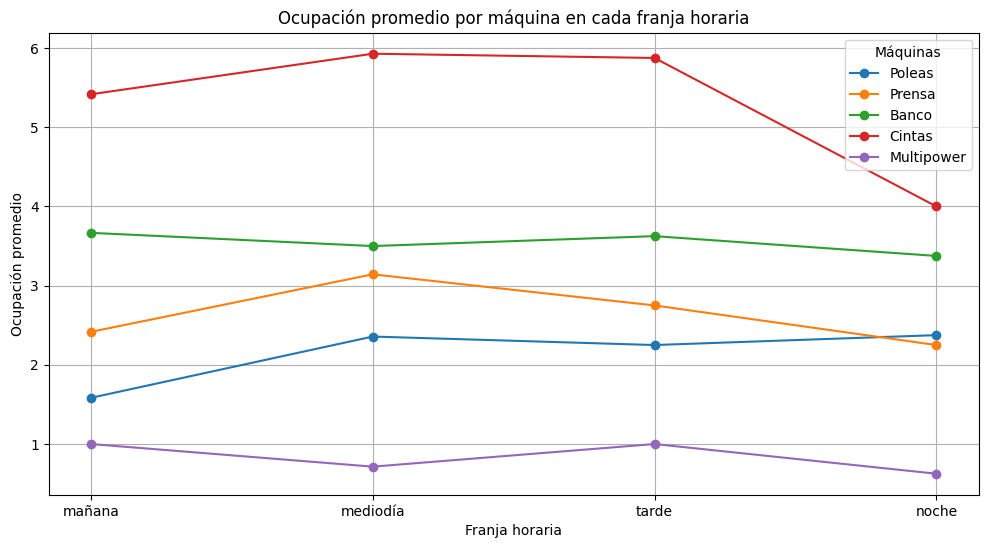

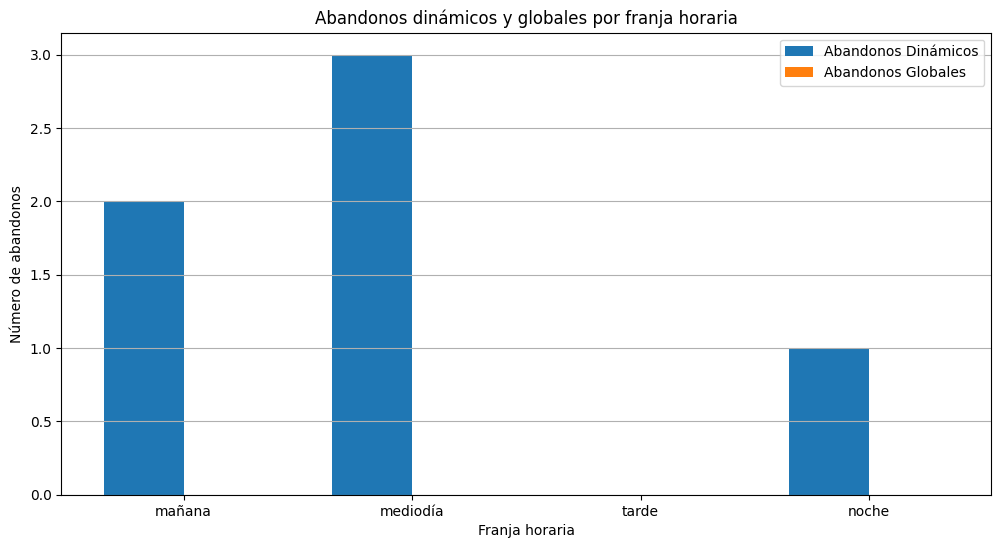

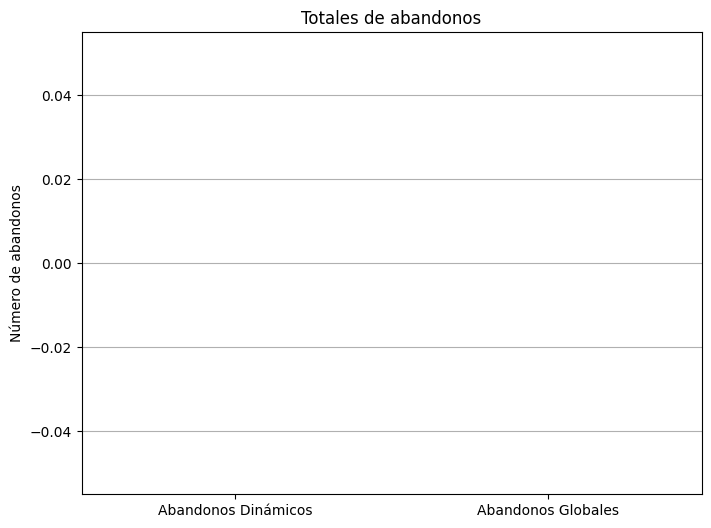

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Simulación previamente configurada (ajustar tu código antes de esto)

# Crear gráficas
def generar_graficas(resultados_por_franja, total_abandonos_dinamicos, total_abandonos_globales):
    # Datos para las gráficas
    franjas = list(resultados_por_franja.keys())
    maquinas = list(next(iter(resultados_por_franja.values()))["ocupacion"].keys())

    # --- Gráfica 1: Ocupación promedio por máquina en cada franja horaria ---
    plt.figure(figsize=(12, 6))
    for maquina in maquinas:
        ocupacion = [resultados_por_franja[franja]["ocupacion"][maquina] for franja in franjas]
        plt.plot(franjas, ocupacion, marker="o", label=maquina.capitalize())
    plt.title("Ocupación promedio por máquina en cada franja horaria")
    plt.xlabel("Franja horaria")
    plt.ylabel("Ocupación promedio")
    plt.legend(title="Máquinas")
    plt.grid()
    plt.show()

    # --- Gráfica 2: Abandonos dinámicos y globales por franja horaria ---
    abandonos_dinamicos = [resultados_por_franja[franja]["abandono_dinamico"] for franja in franjas]
    abandonos_globales = [resultados_por_franja[franja]["abandono_global"] for franja in franjas]

    x = np.arange(len(franjas))  # Posiciones para las barras
    width = 0.35  # Ancho de las barras

    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, abandonos_dinamicos, width, label="Abandonos Dinámicos")
    plt.bar(x + width / 2, abandonos_globales, width, label="Abandonos Globales")
    plt.title("Abandonos dinámicos y globales por franja horaria")
    plt.xlabel("Franja horaria")
    plt.ylabel("Número de abandonos")
    plt.xticks(x, franjas)
    plt.legend()
    plt.grid(axis="y")
    plt.show()

    # --- Gráfica 3: Totales de abandonos ---
    labels = ["Abandonos Dinámicos", "Abandonos Globales"]
    valores = [total_abandonos_dinamicos, total_abandonos_globales]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, valores, color=["blue", "orange"])
    plt.title("Totales de abandonos")
    plt.ylabel("Número de abandonos")
    plt.grid(axis="y")
    plt.show()


# Generar gráficas con los resultados de la simulación
generar_graficas(resultados_por_franja, total_abandonos_dinamicos, total_abandonos_globales)
